In [118]:
print('Introduction:\nThe purpose of this report is to investigate the titanic data and create questions in order to find out how certain factors\neffects the survival rate.\nThe data contains information about 891 passengers who boarded the titanic\n')
print('Questions we will investigate are:\n->Does the class affect the the survival rate?\n->Does Age have anything to do with survival rate?\n')
print('Data Handling:\nBefore we start to analyse we will cleanup the data namely:\n->Removing unneccsary columns I will not be using\n->Removing passengers with missing datasets i.e. Age\n->Removing Duplicate data so that information is more accurate')

Introduction:
The purpose of this report is to investigate the titanic data and create questions in order to find out how certain factors
effects the survival rate.
The data contains information about 891 passengers who boarded the titanic

Questions we will investigate are:
->Does the class affect the the survival rate?
->Does Age have anything to do with survival rate?

Data Handling:
Before we start to analyse we will cleanup the data namely:
->Removing unnecessary columns I will not be using
->Removing passengers with missing datasets i.e. Age
->Removing Duplicate data so that information is more accurate


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
%matplotlib inline

In [120]:
#check if the data reads in correctly & show head to make sure

In [121]:
titanic_data = pd.read_csv('titanic.csv') 
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
#removing all the duplicate data so that analysis is more accurate

In [123]:
titanic_data_duplicates_remove = titanic_data.duplicated() 
print ('Number of duplicate entries is/are {}'.format(titanic_data_duplicates_remove.sum()))

Number of duplicate entries is/are 0


In [124]:
print('Show the handled data:')
titanic_data_handled = titanic_data.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'], axis=1) 
titanic_data_handled.head()

Show the handled data:


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [125]:
#check each column and the amount of missing data

In [126]:
titanic_data_handled.isnull().sum() #check each column for count of missin cells

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [127]:
#Have a look at some of the tuples with missing data
print('What does this tell us: we know that the missing data will affect the analysis because it is quite a large of missing age data. This needs to be taken into account')

What does this tell us: we know that the missing data will affect the analysis because it is quite a large of missing age data. This needs to be taken into account


In [128]:
print('show proof of missing data in age column')
empty_age_bool = pd.isnull(titanic_data_handled['Age']) 
titanic_data_handled[empty_age_bool].head()

show proof of missing data in age column


,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,NaN,0,0
17,1,2,male,NaN,0,0
19,1,3,female,NaN,0,0
26,0,3,male,NaN,0,0
28,1,3,female,NaN,0,0


In [129]:
missing_age_female = titanic_data_handled[missing_age_bool]['Sex'] == 'female' 
missing_age_male = titanic_data_handled[missing_age_bool]['Sex'] == 'male'

print ('Number for females and males with age missing are {} and {} respectively'.format( missing_age_female.sum(),missing_age_male.sum()))
print('the results are correct because it adds up to 177 which was found in the previous investigation')

Number for females and males with age missing are 53 and 124 respectively
the results are correct because it adds up to 177 which was found in the previous investigation


In [130]:
#Question 1: does the class affect the the survival rate?

In [131]:
def survival_rate(pclass, sex): 
    """ Args: pclass: class value 1,2 or 3 sex: male or female Returns: survival rate as percentage. """ 
    grouping_by_total = titanic_data_handled.groupby(['Pclass', 'Sex']).size()[pclass,sex].astype('float') 
    grouping_by_survival_sex = titanic_data_handled.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex].astype('float') 
    survived_sex_pct = (grouping_by_survival_sex / grouping_by_total * 100).round(2)
    return survived_sex_pct

In [132]:
groupedby_class_survived_size = titanic_data_handled.groupby(['Pclass','Survived','Sex']).size()

In [133]:
print (groupedby_class_survived_size) 
print (('Class 1 - female survival rate: {}%|'.format(survival_rate(1,'female')))) 
print ('Class 1 - male survival rate: {}%  |'.format(survival_rate(1,'male')))
print ('---------------------------------------') 
print ('Class 2 - female survival rate: {}%|'.format(survival_rate(2,'female'))) 
print ('Class 2 - male survival rate: {}%  |'.format(survival_rate(2,'male'))) 
print ('---------------------------------------') 
print ('Class 3 - female survival rate: {}% |'.format(survival_rate(3,'female'))) 
print ('Class 3 - male survival rate: {}%  |'.format(survival_rate(3,'male')))

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64
Class 1 - female survival rate: 96.81%|
Class 1 - male survival rate: 36.89%  |
---------------------------------------
Class 2 - female survival rate: 92.11%|
Class 2 - male survival rate: 15.74%  |
---------------------------------------
Class 3 - female survival rate: 50.0% |
Class 3 - male survival rate: 13.54%  |


1 means survived and 0 means died


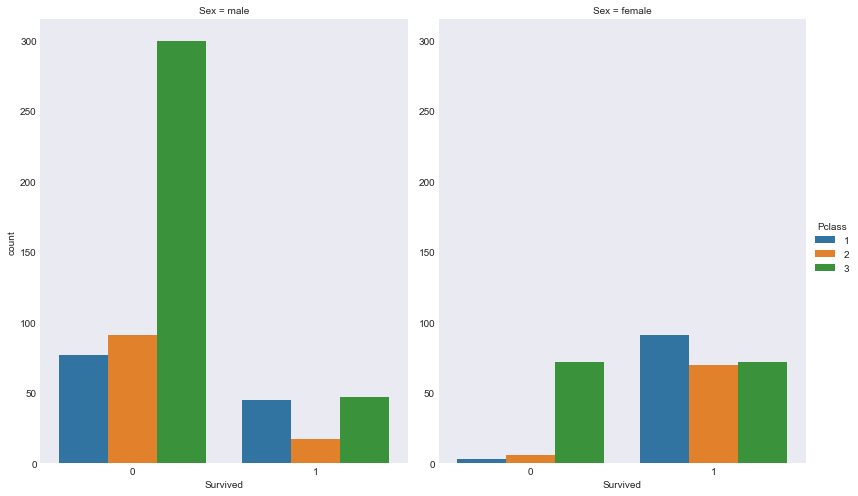

In [134]:
print('1 means survived and 0 means died')


Survival_classes.set_axis_labels('', 'Survival Rate') .set_xticklabels(["Men", "Women"]) .set_titles("Class {col_name}") .set(ylim=(0, 1)) .despine(left=True, bottom=True)
Survival_classes= sns.factorplot('Survived', col='Sex', hue='Pclass', data=titanic_data_handled, kind='count', size=7, aspect=.8)


In [135]:

print('Based on the graph we can see that females in the the lower class has a similar survival rate \nIn the upper class 119 and 136 passengers had survived \nBut if you look at the percentages from the table of all individuals per class and numbers across each class, we can make a statement that people in the upper class have 2.5 times more chance of survival than the lower class ')

Based on the graph we can see that females in the the lower class has a similar survival rate 
In the upper class 119 and 136 passengers had survived 
But if you look at the percentages from the table of all individuals per class and numbers across each class, we can make a statement that people in the upper class have 2.5 times more chance of survival than the lower class 


In [136]:
#Question 2: Does Age have anything to do with survival rate?

In [137]:
#get rid of empty age cells
print ('Number of men and woman with age missing are {} and {} respectively'.format( missing_age_female.sum(),missing_age_male.sum()))

Number of men and woman with age missing are 53 and 124 respectively


In [138]:
titanic_data_age_handled = titanic_data_handled.dropna()

In [139]:
Total_number_survived = titanic_data_age_handled[titanic_data_age_handled['Survived'] == True]['Survived'].count() 
Total_number_died = titanic_data_age_handled[titanic_data_age_handled['Survived'] == False]['Survived'].count()

In [140]:
mean_age_survived = titanic_data_age_handled[titanic_data_age_handled['Survived'] == True]['Age'].mean() 
mean_age_died = titanic_data_age_handled[titanic_data_age_handled['Survived'] == False]['Age'].mean()

In [141]:
oldest_to_survive = titanic_data_handled[titanic_data_handled['Survived'] == True]['Age'].max() 
oldest_to_die = titanic_data_handled[titanic_data_handled['Survived'] == False]['Age'].max()

In [142]:
print ('Total # of survivors {} \nTotal # of non survivors {} \nMean age of survivors {} \nMean age of non survivors {} \nOldest to survive {} \nOldest to not survive {}'.format(number_survived, number_died, np.round(mean_age_survived), np.round(mean_age_died), oldest_to_survive, oldest_to_die))

Total # of survivors 290 
Total # of non survivors 424 
Mean age of survivors 28.0 
Mean age of non survivors 31.0 
Oldest to survive 80.0 
Oldest to not survive 74.0


Based on the findings we can see that: 
-> Age does not play a part in the survival rate 
-> As you can see the survival rate average for males and females are relatively inline thus we can make this assumption


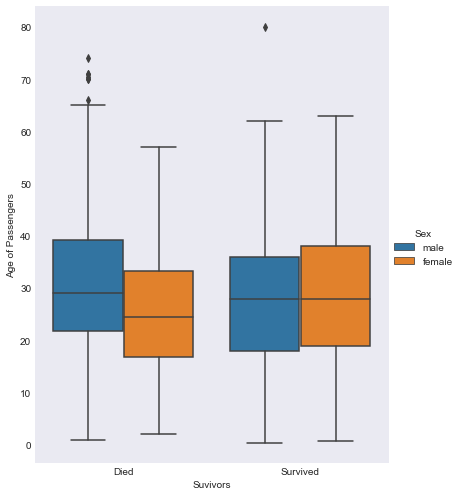

In [143]:

Age_of_Passengers_breakdown = sns.factorplot(x="Survived", y="Age", hue='Sex', data=titanic_data_age_cleaned, kind="box", size=7, aspect=.8)
(Age_of_Passengers_breakdown.set_axis_labels('Suvivors', 'Age of Passengers') .set_xticklabels(["Died", "Survived"]) )
print ('Based on the findings we can see that: \n-> Age does not play a part in the survival rate \n-> As you can see the survival rate average for males and females are relatively inline thus we can make this assumption')

In [144]:
print('Conclusion')
print('In the analysis that I have compiled, although some data are uncertain, it appears that Class and Sex mainly being a female in upper_class has the best chance of survival during the calamity. The Age factor does not seem to affect the survival rate. However being a male in lower class would have the the slimest chance of survival')

Conclusion
In the analysis that I have compiled, although some data are uncertain, it appears that Class and Sex mainly being a female in upper_class has the best chance of survival during the calamity. The Age factor does not seem to affect the survival rate. However being a male in lower class would have the the slimest chance of survival
